# Model Fitness Analysis 

## 1. Project Setup and Data Collection

### 1.1 Environment Setup

In [1]:
# Essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
# Configure visualization settings
plt.style.use('ggplot')
sns.set_context("notebook", font_scale=1.2)
%matplotlib inline

### 1.2 Data Collection

In [2]:
df = pd.read_csv('datasets/gym_churn_us.csv')

## 2. Data Understanding and Cleaning

### 2.1 Initial Data Exploration

In [3]:
# Basic information
print(f"Dataset shape: {df.shape}")
print(f"\nDataset info:")
df.info()
print(f"\nDescriptive statistics:")
display(df.describe(include='all').T)

Dataset shape: (4000, 14)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequ

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
Near_Location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
Partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
Promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
Phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
Contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
Group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
Age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
Avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
Month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


In [4]:
# Check first and last rows
display(df.head())
display(df.tail())

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0
3999,1,0,1,0,0,12,1,30,178.861814,12.0,1,1.101832,1.035270,0


In [5]:
# Column types
print(df.dtypes)

gender                                 int64
Near_Location                          int64
Partner                                int64
Promo_friends                          int64
Phone                                  int64
Contract_period                        int64
Group_visits                           int64
Age                                    int64
Avg_additional_charges_total         float64
Month_to_end_contract                float64
Lifetime                               int64
Avg_class_frequency_total            float64
Avg_class_frequency_current_month    float64
Churn                                  int64
dtype: object


### 2.2 Missing Values

In [6]:
# Identify missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values('Percentage', ascending=False)
display(missing_df)

,Missing Values,Percentage


In [7]:
# Count missing values in entire dataframe
df.isnull().sum().sum()

np.int64(0)

In [8]:
# Analisando o conjunto de dados quanto a valores ausentes e estatísticas descritivas

# Verificando se há valores ausentes
print("Análise de valores ausentes:")
print("-" * 50)
print(f"Total de valores ausentes no dataset: {df.isnull().sum().sum()}")
print("\nNão há valores ausentes no conjunto de dados.")

# Analisando estatísticas descritivas
print("\nAnálise de estatísticas descritivas:")
print("-" * 50)
print("\nVariáveis com maior variabilidade (maior desvio padrão):")
std_series = df.std().sort_values(ascending=False)
for col, std in std_series.head().items():
    mean = df[col].mean()
    print(f"{col:30} | Média: {mean:10.2f} | Desvio Padrão: {std:10.2f}")

print("\nVariáveis com menor variabilidade (menor desvio padrão):")
for col, std in std_series.tail().items():
    mean = df[col].mean()
    print(f"{col:30} | Média: {mean:10.2f} | Desvio Padrão: {std:10.2f}")


Análise de valores ausentes:
--------------------------------------------------
Total de valores ausentes no dataset: 0

Não há valores ausentes no conjunto de dados.

Análise de estatísticas descritivas:
--------------------------------------------------

Variáveis com maior variabilidade (maior desvio padrão):
Avg_additional_charges_total   | Média:     146.94 | Desvio Padrão:      96.36
Contract_period                | Média:       4.68 | Desvio Padrão:       4.55
Month_to_end_contract          | Média:       4.32 | Desvio Padrão:       4.19
Lifetime                       | Média:       3.72 | Desvio Padrão:       3.75
Age                            | Média:      29.18 | Desvio Padrão:       3.26

Variáveis com menor variabilidade (menor desvio padrão):
Group_visits                   | Média:       0.41 | Desvio Padrão:       0.49
Promo_friends                  | Média:       0.31 | Desvio Padrão:       0.46
Churn                          | Média:       0.27 | Desvio Padrão:       0

## 3. Exploratory Data Analysis (EDA)

### 3.1 Churn & Non-Churn

In [9]:
# Analyzing means for churned vs non-churned customers
print("Mean values comparison between churned and non-churned customers:")
print("-" * 80)

# Group by Churn and calculate means for all numeric columns
churn_comparison = df.groupby('Churn').mean()

# Display the comparison
display(churn_comparison)

# Calculate the percentage difference between churned and non-churned
pct_diff = ((churn_comparison.loc[1] - churn_comparison.loc[0]) / churn_comparison.loc[0] * 100)
print("\nPercentage difference (Churned vs Non-churned):")
print("-" * 80)
for col, diff in pct_diff.items():
    print(f"{col:30} : {diff:>10.2f}%")


Mean values comparison between churned and non-churned customers:
--------------------------------------------------------------------------------


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546



Percentage difference (Churned vs Non-churned):
--------------------------------------------------------------------------------
gender                         :       0.16%
Near_Location                  :     -12.02%
Partner                        :     -33.48%
Promo_friends                  :     -48.01%
Phone                          :      -0.09%
Contract_period                :     -69.92%
Group_visits                   :     -42.12%
Age                            :      -9.96%
Avg_additional_charges_total   :     -27.37%
Month_to_end_contract          :     -68.53%
Lifetime                       :     -78.98%
Avg_class_frequency_total      :     -27.16%
Avg_class_frequency_current_month :     -48.49%


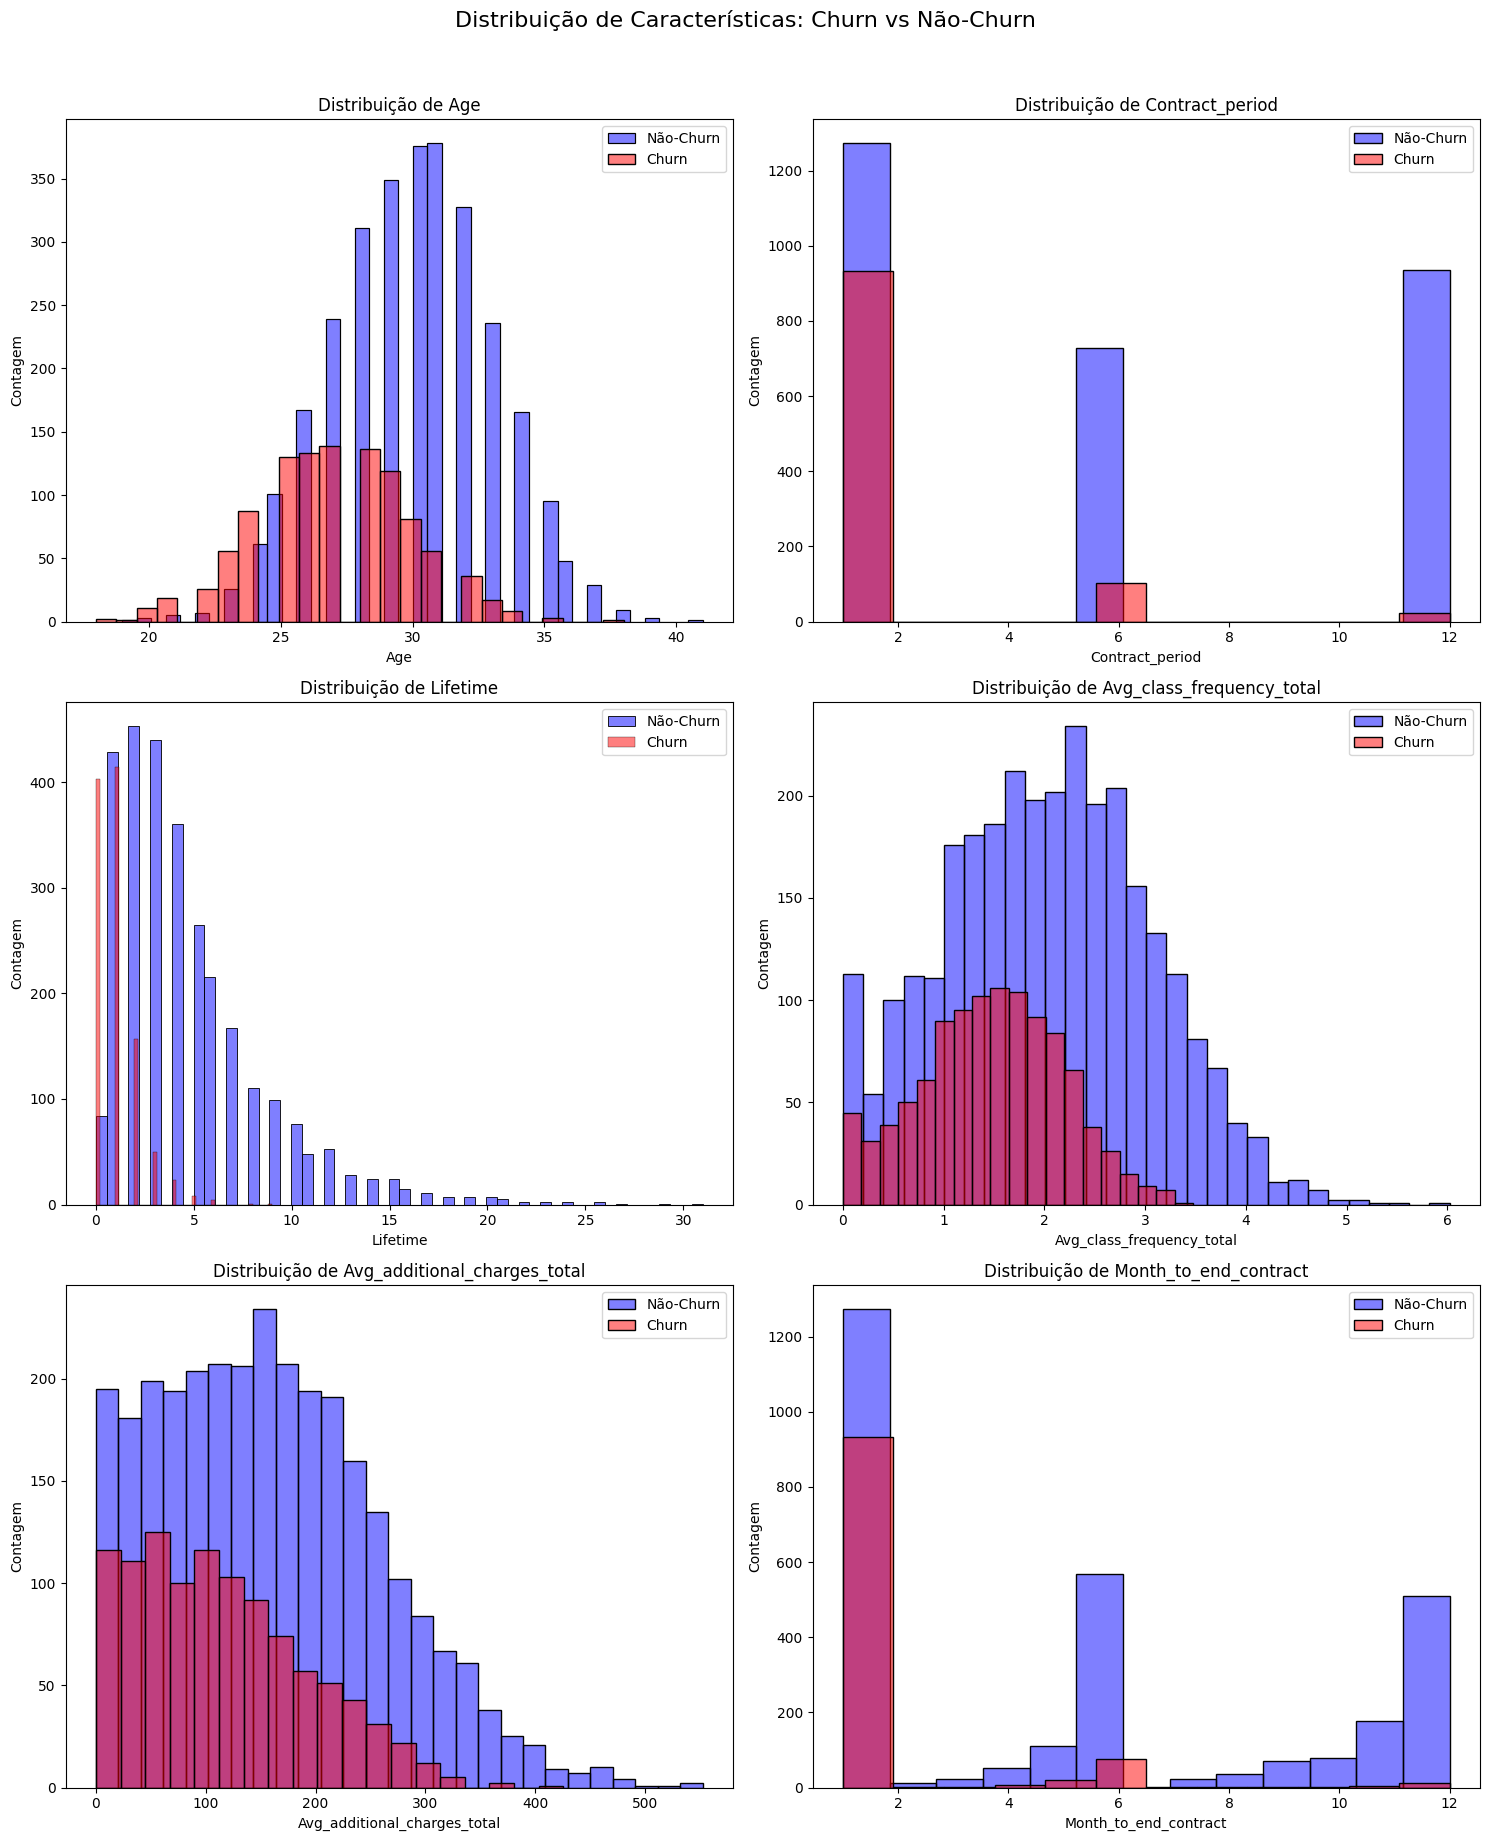

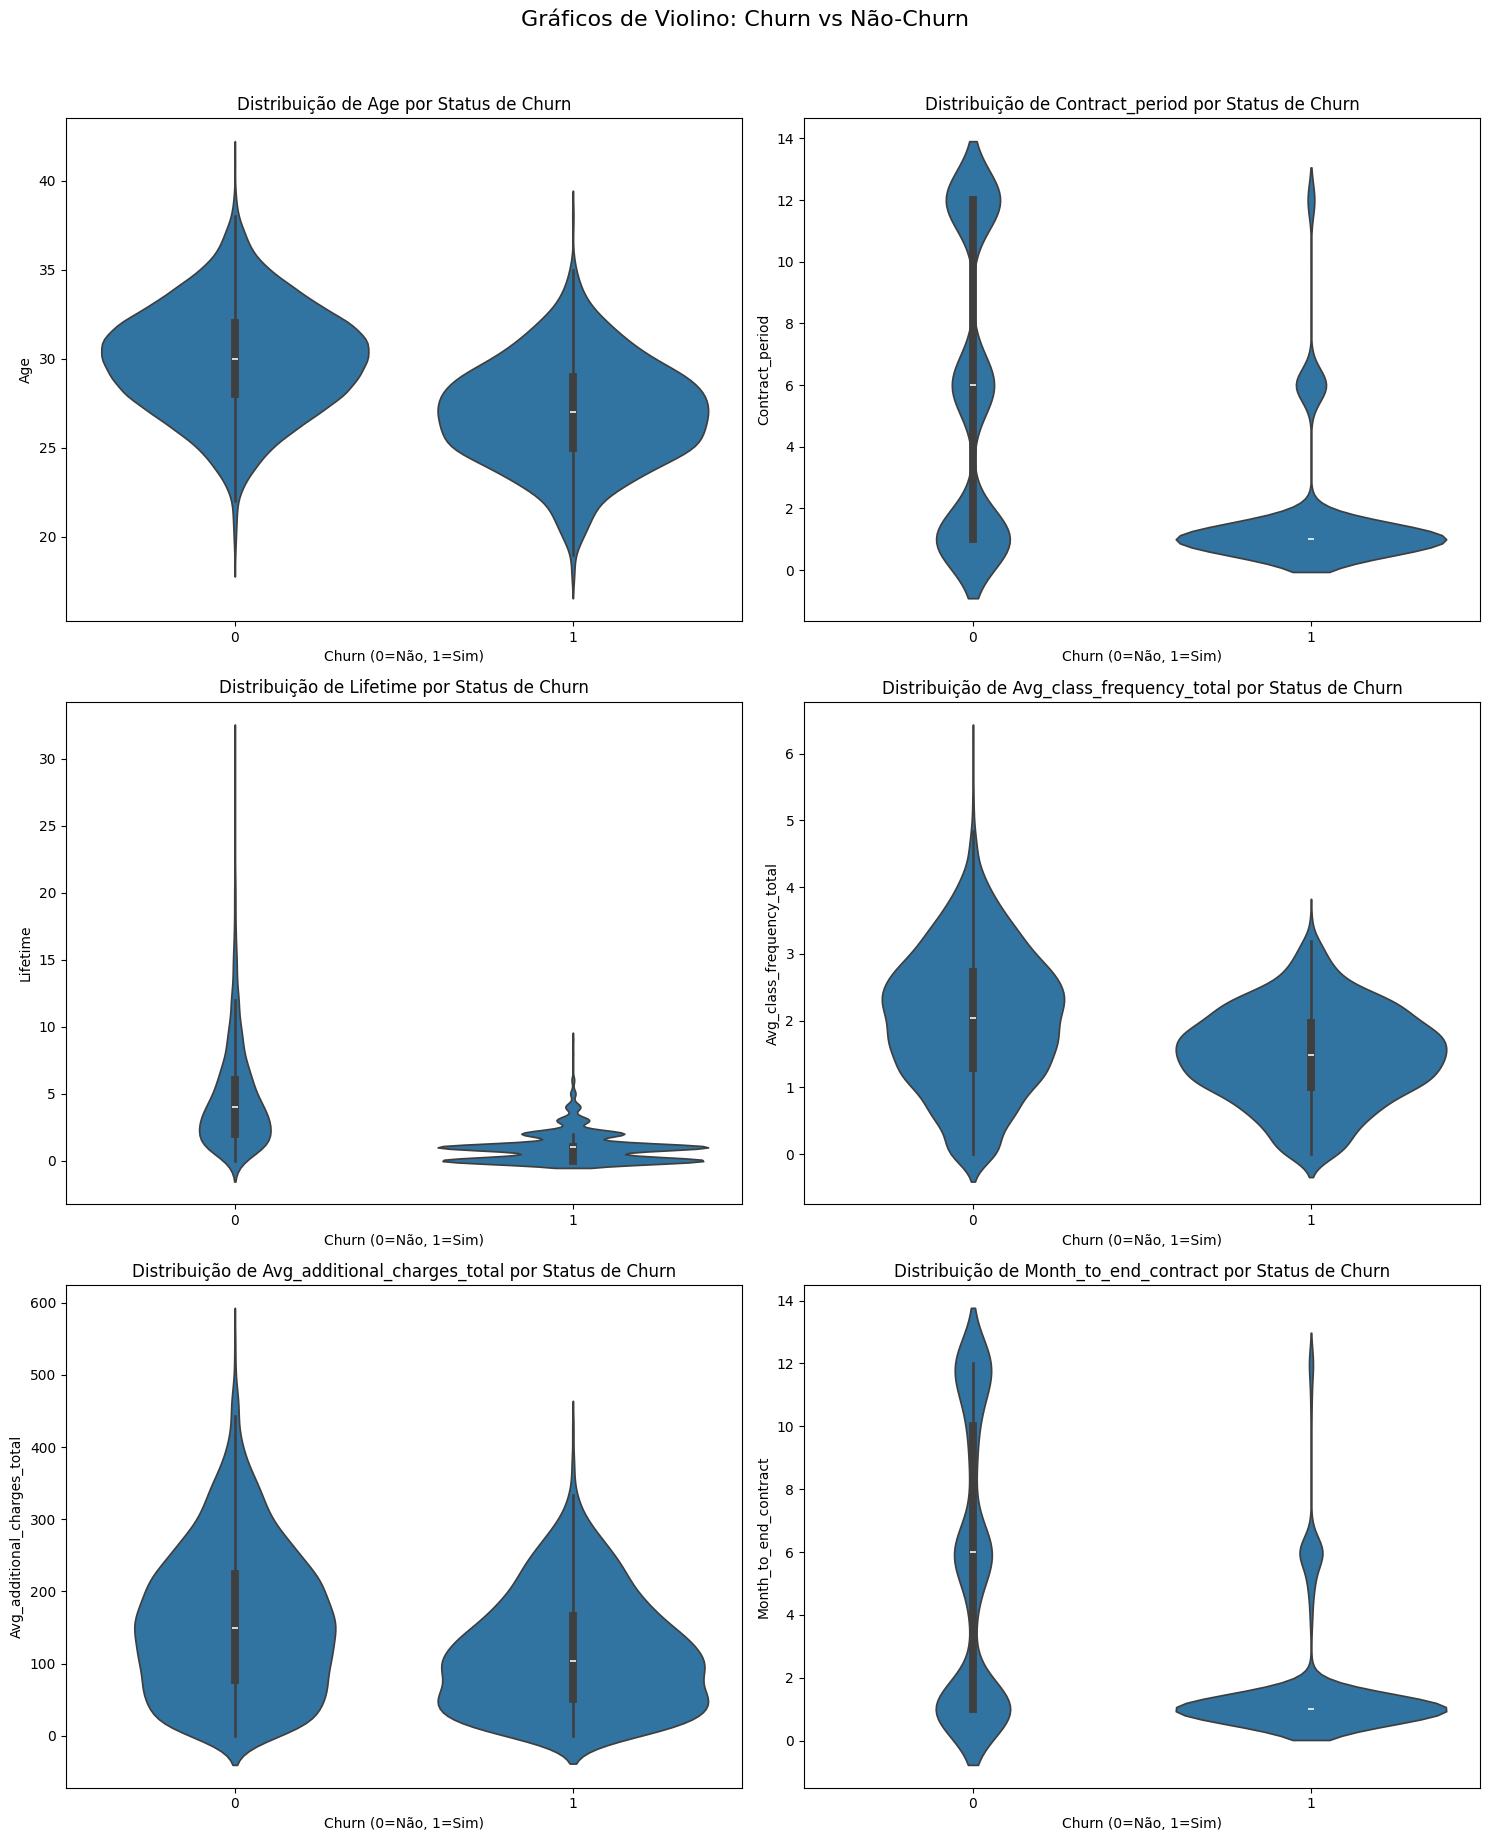

In [10]:
# Criar histogramas para comparar distribuições entre clientes que saíram e permaneceram
plt.style.use('default')  # Using default style instead of seaborn

# Selecionar variáveis numéricas mais relevantes
numeric_cols = ['Age', 'Contract_period', 'Lifetime', 'Avg_class_frequency_total', 
                'Avg_additional_charges_total', 'Month_to_end_contract']

# Criar subplots para cada variável
fig, axes = plt.subplots(3, 2, figsize=(15, 18))
fig.suptitle('Distribuição de Características: Churn vs Não-Churn', fontsize=16, y=1.02)

# Plotar histogramas
for idx, col in enumerate(numeric_cols):
    row = idx // 2
    col_idx = idx % 2
    
    # Criar histograma sobreposto
    sns.histplot(data=df[df['Churn'] == 0], x=col, 
                label='Não-Churn', alpha=0.5, 
                ax=axes[row, col_idx], color='blue')
    sns.histplot(data=df[df['Churn'] == 1], x=col, 
                label='Churn', alpha=0.5, 
                ax=axes[row, col_idx], color='red')
    
    axes[row, col_idx].set_title(f'Distribuição de {col}')
    axes[row, col_idx].legend()
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Contagem')

plt.tight_layout()
plt.show()

# Criar gráficos de violino para visualizar a distribuição completa
fig, axes = plt.subplots(3, 2, figsize=(15, 18))
fig.suptitle('Gráficos de Violino: Churn vs Não-Churn', fontsize=16, y=1.02)

for idx, col in enumerate(numeric_cols):
    row = idx // 2
    col_idx = idx % 2
    
    sns.violinplot(data=df, x='Churn', y=col, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Distribuição de {col} por Status de Churn')
    axes[row, col_idx].set_xlabel('Churn (0=Não, 1=Sim)')

plt.tight_layout()
plt.show()


### 3.2 matriz de correlação

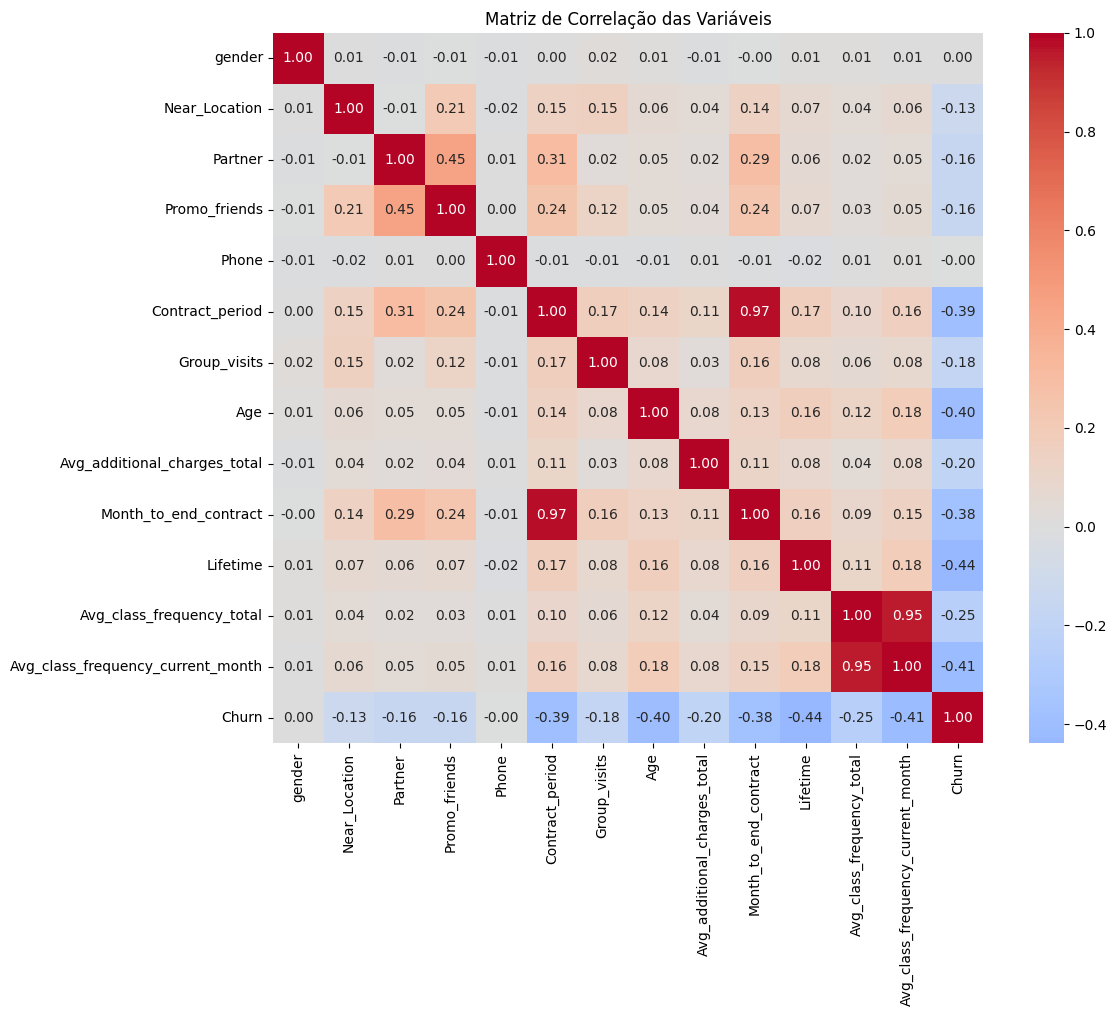

In [11]:
# Calcular a matriz de correlação
correlation_matrix = df.corr()

# Criar um mapa de calor da matriz de correlação
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
            annot=True,  # Mostrar os valores
            cmap='coolwarm',  # Esquema de cores
            center=0,  # Centralizar o mapa de cores em 0
            fmt='.2f',  # Formato dos números (2 casas decimais)
            square=True)  # Fazer células quadradas

plt.title('Matriz de Correlação das Variáveis')
plt.tight_layout()
plt.show()

## 4. ML Model

### 4.1 Modelo para predizer a rotatividade de clientes

Tamanho do conjunto de treinamento: 3200
Tamanho do conjunto de teste: 800

MODELO 1: REGRESSÃO LOGÍSTICA
Acurácia: 0.9237
Precisão: 0.8756
Sensibilidade (Recall): 0.8302

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       588
           1       0.88      0.83      0.85       212

    accuracy                           0.92       800
   macro avg       0.91      0.89      0.90       800
weighted avg       0.92      0.92      0.92       800


MODELO 2: FLORESTA ALEATÓRIA
Acurácia: 0.9275
Precisão: 0.8850
Sensibilidade (Recall): 0.8349

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       588
           1       0.89      0.83      0.86       212

    accuracy                           0.93       800
   macro avg       0.91      0.90      0.91       800
weighted avg       0.93      0.93      0.93       800


COMPARAÇÃO DOS MODELO

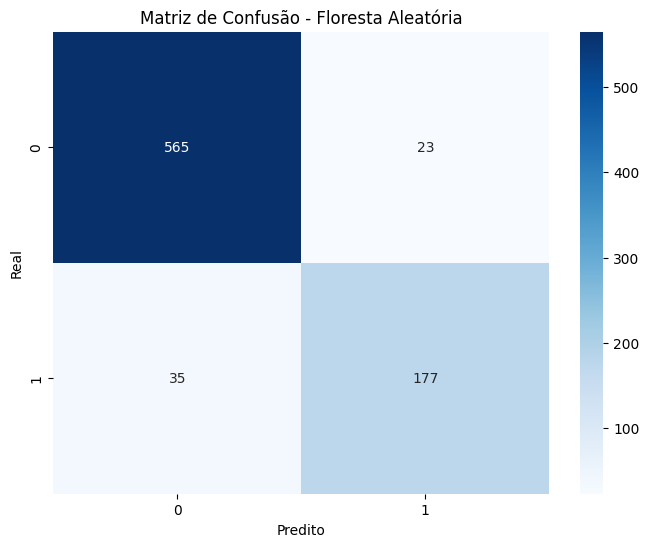

In [12]:
# Importar bibliotecas necessárias para machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score
import pandas as pd

# Preparar os dados
# Separar features (X) e target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Tamanho do conjunto de treinamento: {X_train.shape[0]}")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]}")

# ===== MODELO 1: REGRESSÃO LOGÍSTICA =====
print("\n" + "="*50)
print("MODELO 1: REGRESSÃO LOGÍSTICA")
print("="*50)

# Treinar modelo de Regressão Logística
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

# Fazer predições
lr_predictions = lr_model.predict(X_test)

# Calcular métricas
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_precision = precision_score(y_test, lr_predictions)
lr_recall = recall_score(y_test, lr_predictions)

print(f"Acurácia: {lr_accuracy:.4f}")
print(f"Precisão: {lr_precision:.4f}")
print(f"Sensibilidade (Recall): {lr_recall:.4f}")

print("\nRelatório de Classificação:")
print(classification_report(y_test, lr_predictions))

# ===== MODELO 2: FLORESTA ALEATÓRIA =====
print("\n" + "="*50)
print("MODELO 2: FLORESTA ALEATÓRIA")
print("="*50)

# Treinar modelo de Floresta Aleatória
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Fazer predições
rf_predictions = rf_model.predict(X_test)

# Calcular métricas
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)

print(f"Acurácia: {rf_accuracy:.4f}")
print(f"Precisão: {rf_precision:.4f}")
print(f"Sensibilidade (Recall): {rf_recall:.4f}")

print("\nRelatório de Classificação:")
print(classification_report(y_test, rf_predictions))

# ===== COMPARAÇÃO DOS MODELOS =====
print("\n" + "="*50)
print("COMPARAÇÃO DOS MODELOS")
print("="*50)

comparison_df = pd.DataFrame({
    'Métrica': ['Acurácia', 'Precisão', 'Sensibilidade'],
    'Regressão Logística': [lr_accuracy, lr_precision, lr_recall],
    'Floresta Aleatória': [rf_accuracy, rf_precision, rf_recall]
})

print(comparison_df.round(4))

# Determinar o melhor modelo
if rf_accuracy > lr_accuracy:
    print(f"\n MELHOR MODELO: Floresta Aleatória")
    print(f"Diferença na acurácia: +{(rf_accuracy - lr_accuracy):.4f}")
    best_model = "Floresta Aleatória"
    best_predictions = rf_predictions
else:
    print(f"\n MELHOR MODELO: Regressão Logística")
    print(f"Diferença na acurácia: +{(lr_accuracy - rf_accuracy):.4f}")
    best_model = "Regressão Logística"
    best_predictions = lr_predictions

# Matriz de confusão do melhor modelo
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, best_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Matriz de Confusão - {best_model}')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()


### 4.2 Agrupamento de Clientes

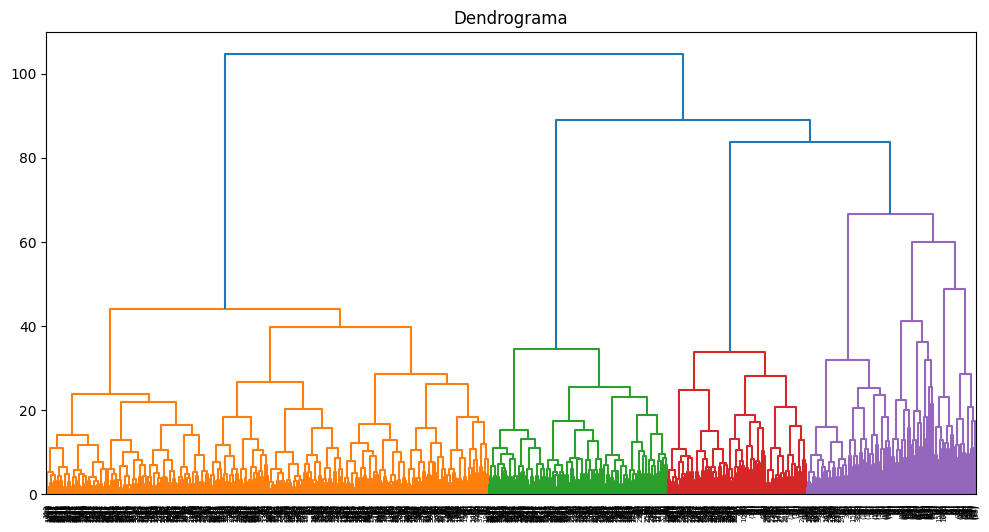

Valores médios por cluster:
         gender  Near_Location  Partner  Promo_friends  Phone  \
Cluster                                                         
0          0.48           0.70     0.30           0.01   0.90   
1          0.49           0.95     0.79           1.00   0.91   
2          0.46           0.91     0.77           0.49   0.93   
3          0.55           0.94     0.74           0.42   0.86   
4          0.57           0.88     0.18           0.05   0.91   

         Contract_period  Group_visits    Age  Avg_additional_charges_total  \
Cluster                                                                       
0                   1.73          0.26  28.07                        127.13   
1                   2.74          0.43  28.90                        139.46   
2                  10.50          0.51  30.09                        164.19   
3                  11.19          0.58  29.72                        167.67   
4                   2.12          0.46  29

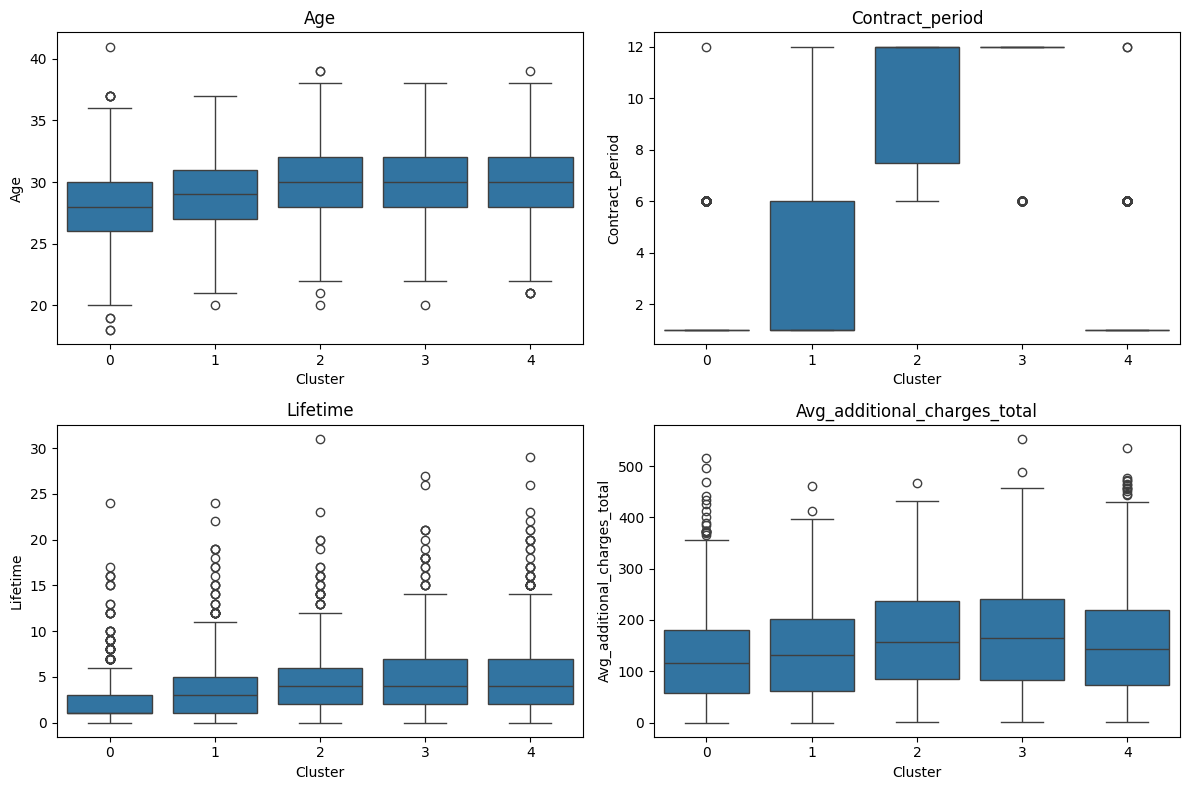


Taxa de churn por cluster:
Cluster
0    0.588
1    0.286
2    0.014
3    0.042
4    0.105
Name: Churn, dtype: float64


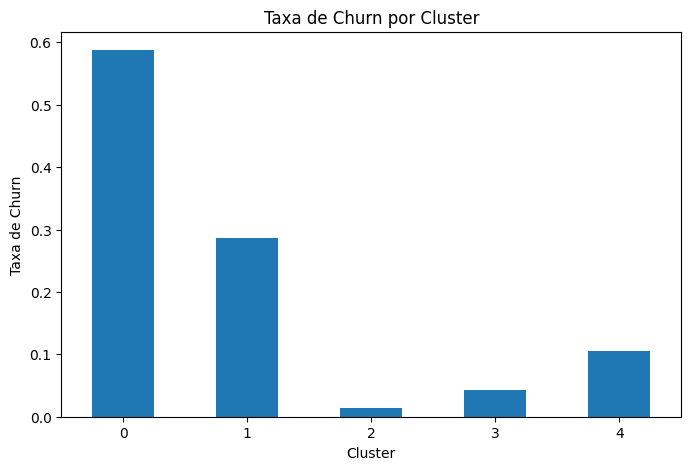

In [13]:
# Importar bibliotecas para clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Construir dendrograma
linkage_matrix = linkage(X_scaled, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=10)
plt.title('Dendrograma')
plt.show()

# 3. K-means com 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters

# 4. Valores médios por cluster
print("Valores médios por cluster:")
print(df.groupby('Cluster').mean().round(2))

# 5. Distribuições principais
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
features = ['Age', 'Contract_period', 'Lifetime', 'Avg_additional_charges_total']
for i, feature in enumerate(features):
    sns.boxplot(data=df, x='Cluster', y=feature, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(feature)
plt.tight_layout()
plt.show()

# 6. Taxa de churn por cluster
churn_rates = df.groupby('Cluster')['Churn'].mean()
print("\nTaxa de churn por cluster:")
print(churn_rates.round(3))

plt.figure(figsize=(8, 5))
churn_rates.plot(kind='bar')
plt.title('Taxa de Churn por Cluster')
plt.ylabel('Taxa de Churn')
plt.xticks(rotation=0)
plt.show()




## 5. Recommendations 


### Conclusões e Recomendações Estratégicas

#### Principais Insights da Análise de Clusters

Com base na segmentação de clientes realizada, identificamos padrões distintos de comportamento que permitem estratégias direcionadas de retenção:

#### 1. **Segmentação por Risco de Churn**
- **Clusters de Alto Risco**: Clientes com contratos curtos e baixa frequência de aulas
- **Clusters de Baixo Risco**: Clientes com contratos longos e alta frequência

**Implementação**:
- Campanhas de retenção proativas para clusters de alto risco
- Ofertas de extensão de contrato com desconto nos primeiros 3 meses
- Programa de acompanhamento personalizado para novos clientes

#### 2. **Estratégia de Valor Baseada em Lifetime**
- Clientes com maior lifetime demonstram maior lealdade e menor propensão ao churn
- Foco em aumentar o engajamento nos primeiros meses de relacionamento

**Implementação**:
- Programa de onboarding estruturado para os primeiros 90 dias
- Sistema de recompensas progressivas baseado no tempo de permanência
- Ofertas especiais para conversão de contratos mensais para anuais

#### 3. **Personalização por Perfil de Uso**
- Diferentes clusters apresentam padrões distintos de frequência e gastos adicionais
- Oportunidade de ofertas customizadas por segmento

**Implementação**:
- Pacotes de serviços adicionais direcionados por cluster
- Campanhas de upselling baseadas no perfil de gastos históricos
- Comunicação segmentada com mensagens relevantes para cada grupo

#### 4. **Monitoramento Preditivo**
- Implementar sistema de early warning baseado nos indicadores identificados
- Intervenção proativa antes que o cliente entre na zona de risco

**Implementação**:
- Dashboard de monitoramento em tempo real dos indicadores de risco
- Alertas automáticos para a equipe de retenção
- Protocolo de contato estruturado para clientes em risco
